In [2]:
from skimage.morphology import skeletonize
from skimage import io, color

In [13]:
image = io.imread('./rule.png')
gray_image = color.rgb2gray(image[:,:,:3])
gray_image = gray_image < 0.5  # true for black, false for white
skeleton = skeletonize(gray_image)

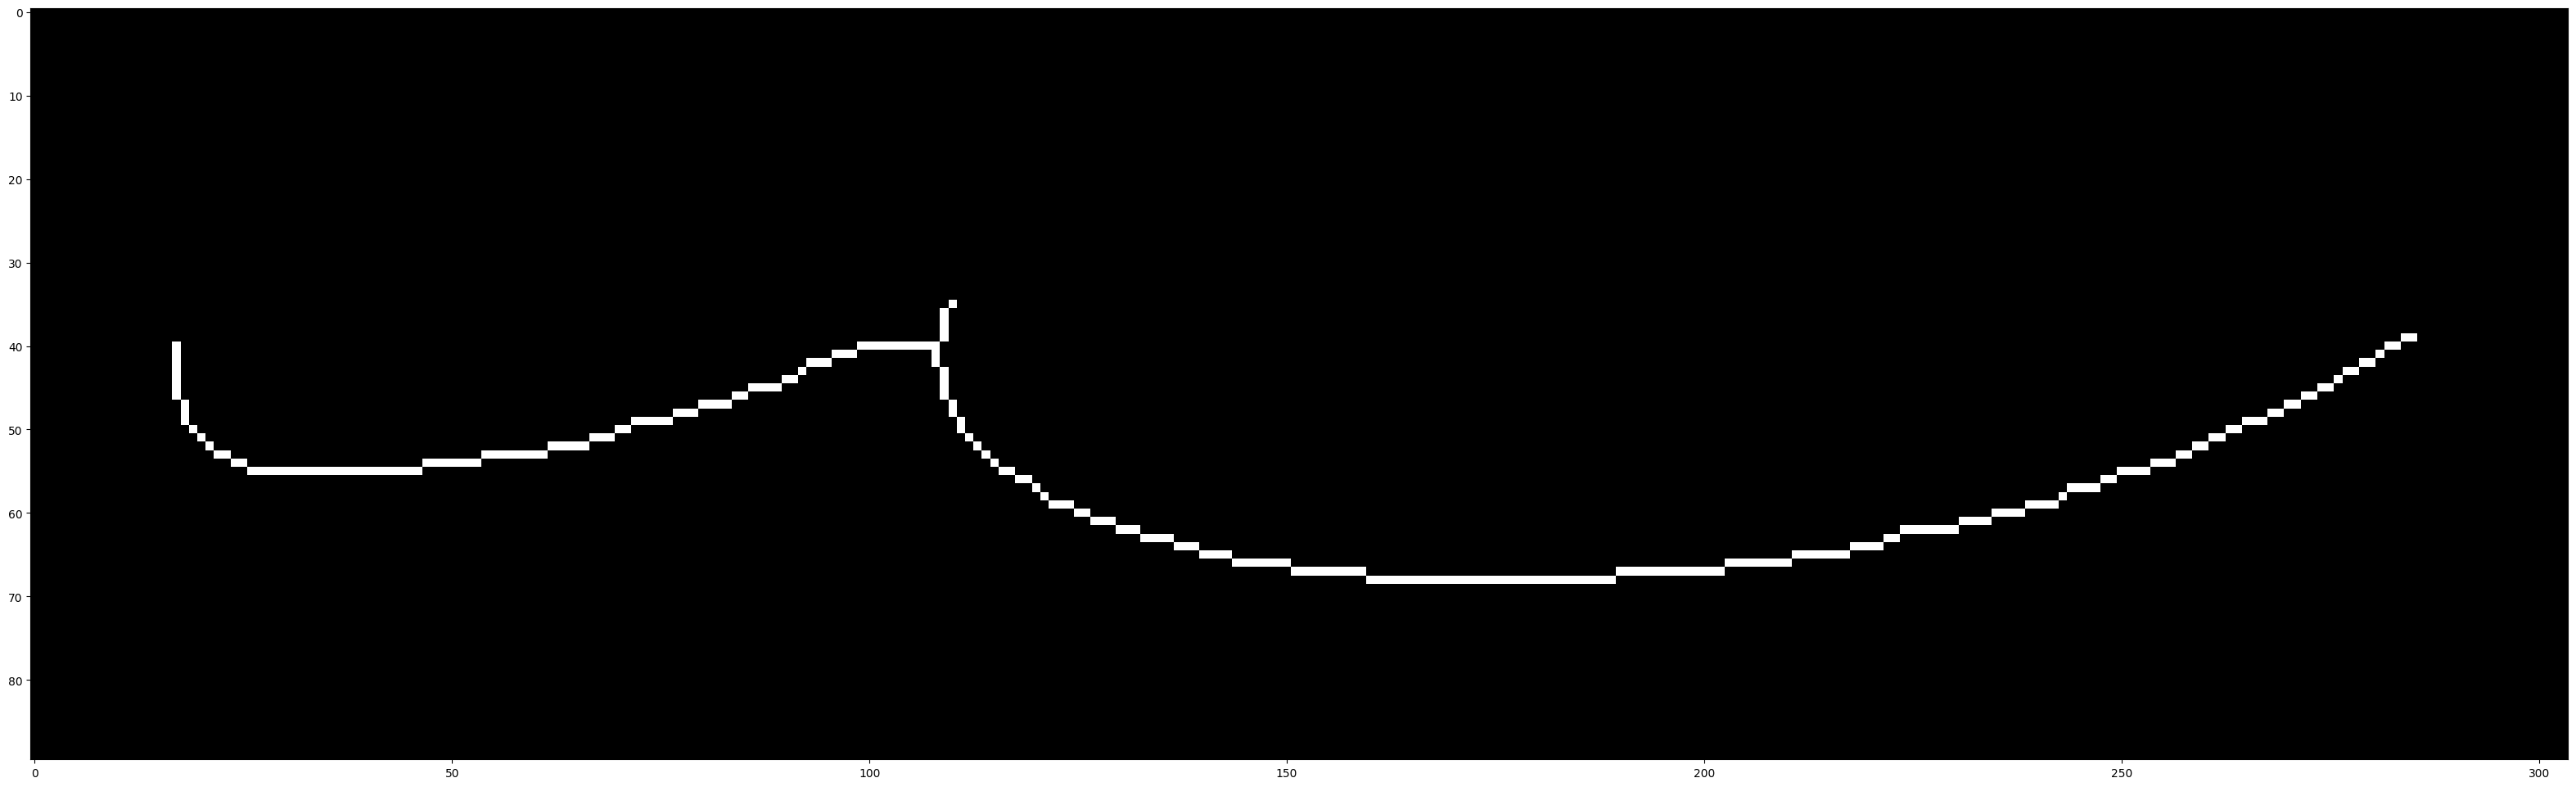

In [26]:
import matplotlib.pyplot as plt
plt.imshow(skeleton, cmap='gray')
plt.rcParams['figure.figsize'] = [40, 40]
plt.show()

In [138]:
def get_vertices(image):
    return np.array(np.nonzero(image)).T

def get_adjacency_mat(vertices):
    adj = vertices[:, None, :] - vertices[None, :, :]
    adj = np.abs(adj) <= 1   # adjacent x and y coords
    adj = adj.all(axis=2)
    adj[np.diag_indices(len(vertices))] = False  # remove self loops
    return adj

def get_neighbors(adj, vertex):
    return np.where(adj[vertex])[0]

def is_end(vertex, adj):
    return len(get_neighbors(adj, vertex)) == 1

def is_joint(vertex, adj):
    return len(get_neighbors(adj, vertex)) > 2

def find_endpoints(adj):
    return np.where(adj.sum(axis=0) == 1)[0]

def find_junctions(adj):
    return np.where(adj.sum(axis=0) > 2)[0]

def get_branch_to_junction(adj, vertex, current_path = None):
    # returns a path to the next junction or terminus (including the final vertex)
    entry = current_path is None
    if current_path is None:
        current_path = []
    current_path.append(vertex)
    neighbors = get_neighbors(adj, vertex)
    if is_joint(vertex, adj):
        return current_path
    if is_end(vertex, adj) and not entry:
        return current_path
    eligible_neighbors = [n for n in neighbors if n not in current_path]
    assert len(eligible_neighbors) == 1
    return get_branch_to_junction(adj, eligible_neighbors[0], current_path)

def get_short_branches(adj, branch_length_threshold):
    verts = []
    for end in find_endpoints(adj):
        branch = get_branch_to_junction(adj, end)
        if len(branch) < branch_length_threshold:
            for v in branch[:-1]:
                if v not in verts:
                    verts.append(v)
    return np.array(verts)

def remove_bad_vertices(vertices, bad_vertices):
    bad_vertices = set(bad_vertices)
    good_vertices = np.array([vertices[i] for i in range(len(vertices)) if i not in bad_vertices])
    return good_vertices

def get_first_terminus(adj, vertices):
    termini = find_endpoints(adj)
    print(termini)
    termini = sorted(termini, key=lambda t: vertices[t][1])  # sort by x coord
    print(termini)
    return termini[0]

In [124]:
verts = get_vertices(skeleton)
adj = get_adjacency_mat(verts)
get_neighbors(adj, 1)
adj.sum(axis=1)
ends = find_endpoints(adj)
get_branch_to_junction(adj, ends[0])
get_short_branches(adj, 10)

array([0, 1, 2, 3, 4])

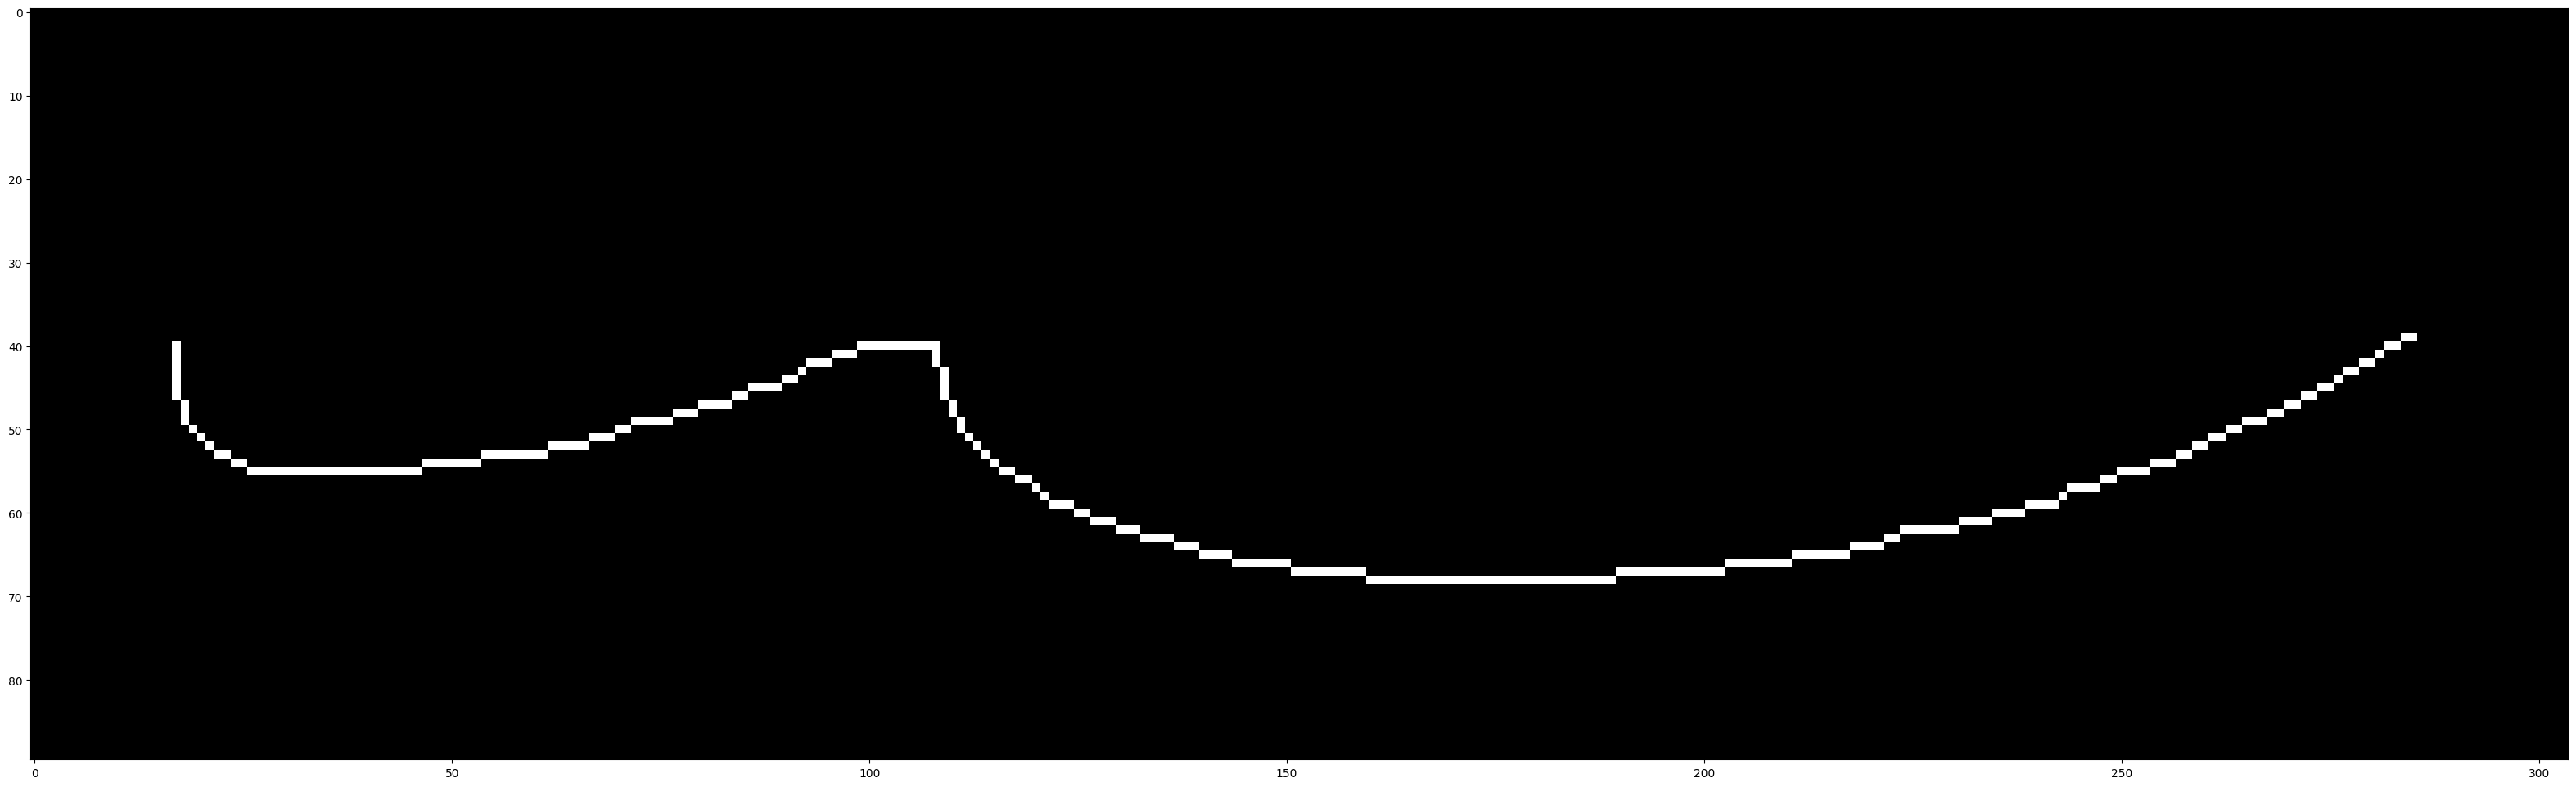

In [126]:
verts2 = remove_bad_vertices( verts, get_short_branches(adj, 10))
image2 = np.zeros_like(skeleton)
for v in verts2:
    image2[v[0], v[1]] = 1
plt.imshow(image2, cmap='gray')
plt.show()

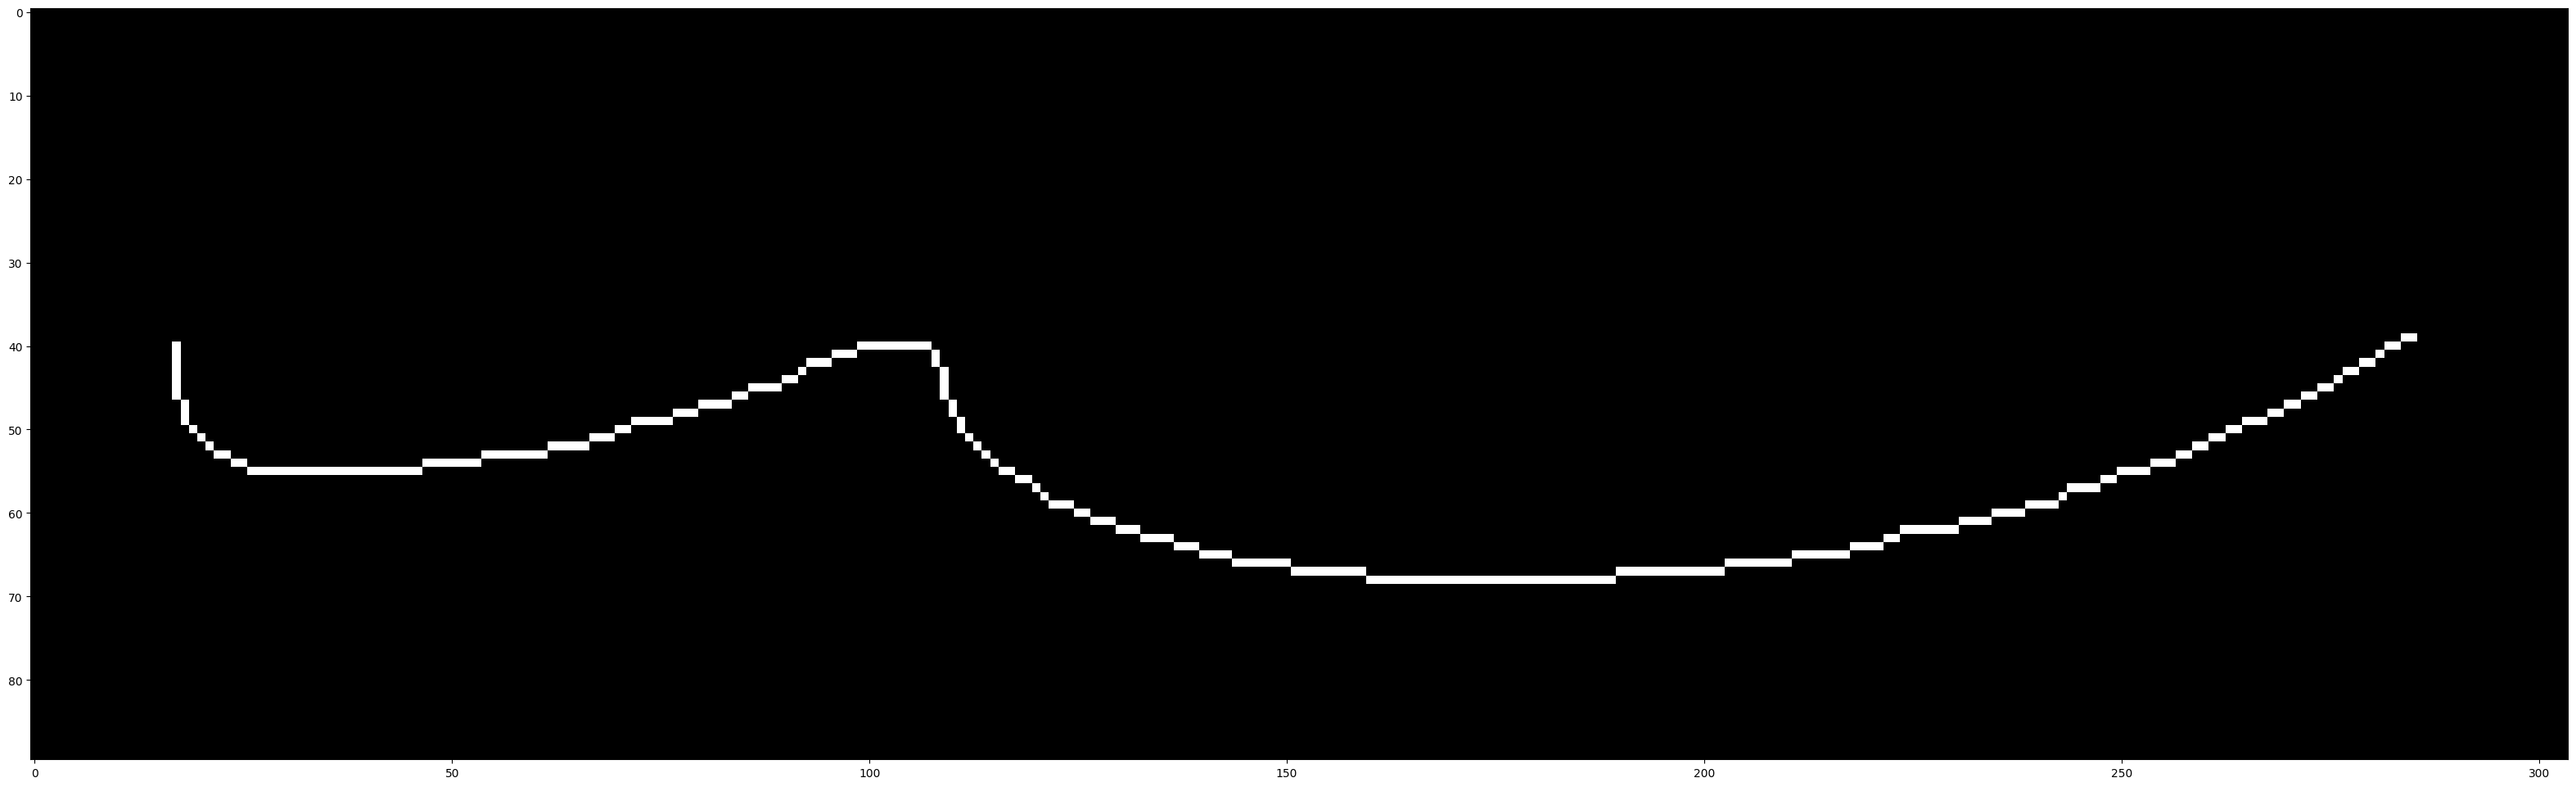

In [142]:
# reskeletonize to remove the junction that still exists
image3 = skeletonize(image2)
plt.imshow(image3, cmap='gray')
verts3 = get_vertices(image3)
adj3 = get_adjacency_mat(verts3)

In [139]:
start = get_first_terminus(adj2, verts2)
path = get_branch_to_junction(adj2, start, None)
find_junctions(adj2)

[1 2]
[np.int64(2), np.int64(1)]


array([11, 19])

In [29]:
import numpy as np
np.nonzero(skeleton)

(array([35, 36, 37, 38, 39, 39, 39, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40,
        40, 40, 40, 41, 41, 41, 41, 41, 41, 42, 42, 42, 42, 42, 42, 42, 43,
        43, 43, 43, 43, 44, 44, 44, 44, 44, 45, 45, 45, 45, 45, 45, 45, 45,
        46, 46, 46, 46, 46, 46, 47, 47, 47, 47, 47, 47, 47, 47, 48, 48, 48,
        48, 48, 48, 48, 49, 49, 49, 49, 49, 49, 49, 49, 49, 49, 50, 50, 50,
        50, 50, 50, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 52, 52, 52, 52,
        52, 52, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 54, 54,
        54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 55, 55, 55, 55, 55, 55,
        55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
        55, 55, 55, 55, 56, 56, 56, 56, 57, 57, 57, 57, 57, 58, 58, 59, 59,
        59, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61,
        61, 62, 62, 62, 62, 62, 62, 62, 62, 62, 62, 63, 63, 63, 63, 63, 63,
        64, 64, 64, 64, 64, 64, 64, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65,
        65, 